In [44]:
#!pip install lightgbm
#!pip install catboost


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.patches as patches
import lightgbm as lgb
from catboost import CatBoostClassifier 

In [2]:
!python  '/workspaces/predictive_maintenance/src/agg_telemetry.py'

In [3]:
df_failures_telemetry_path  = '../data/processed/training_data/df_failures_telemetry_agg.parquet'
df_failures_telemetry_agg = pd.read_parquet(df_failures_telemetry_path)

In [4]:
df_failures_telemetry_agg

mean_volt    mean_rot  mean_press   mean_vib    max_volt  \
id_falla                                                              
0         170.531039  456.201984  100.490012  47.616515  215.656488   
1         177.349055  453.004847  101.140273  40.047256  211.699980   
2         171.324943  371.894679  101.893130  39.339070  203.104007   
3         172.507370  468.114615  100.127784  44.054041  202.610866   
4         169.249910  449.144643   97.975818  49.223726  207.324122   
...              ...         ...         ...        ...         ...   
1308      173.532724  448.671276   99.537533  42.390969  205.922866   
1309      170.158560  448.676714   98.946359  40.122680  195.085807   
1310      168.099439  458.887164  103.649632  38.894612  192.721200   
1311      170.583788  454.535954  100.064203  40.507064  214.404534   
1312      166.848357  450.580616  102.835413  40.561828  190.520432   

             max_rot   max_press    max_vib    min_volt     min_rot  \
id_falla                                                              
0         568.972310  127.014498  66.764515  129.016707  374.127148   
1         578.744306  117.308568  52.891394  138.411029  360.736832   
2         489.502527  121.827141  50.877634  146.713080  215.619476   
3         581.811206  126.893326  61.150030  138.300867  381.047123   
4         586.839392  121.728619  67.409029  138.740244  345.711420   
...              ...         ...        ...         ...         ...   
1308      568.509851  126.407444  59.390286  143.335705  316.985716   
1309      588.393263  116.231470  51.538254  146.760321  334.944901   
1310      582.129496  142.995348  49.574126  142.304519  370.144808   
1311      559.248699  121.545419  53.670349  134.974282  342.777959   
1312      581.768216  129.336021  50.470433  138.597511  329.871326   

          min_press    min_vib   std_volt    std_rot  std_press   std_vib  \
id_falla                                                                    
0         80.668287  30.665184  16.197188  39.070354  10.746510  8.173590   
1         84.557438  25.002313  17.491971  49.773911   7.845809  5.445791   
2         79.552597  30.093808  13.732406  54.763409   9.274640  4.194294   
3         81.351236  29.443212  14.823837  43.322180   8.151996  7.352134   
4         75.959631  37.484103  14.512206  48.343363  11.071074  7.809216   
...             ...        ...        ...        ...        ...       ...   
1308      77.021908  30.759994  14.509493  47.420543  10.577554  7.510491   
1309      78.444266  28.004941  11.989759  53.816370   8.843560  5.389516   
1310      77.037310  25.687218  13.255926  43.798833  11.033122  5.755992   
1311      80.504211  27.345608  14.146979  47.416153   8.739934  5.491435   
1312      79.624682  29.333023  13.983386  49.620378   9.591010  4.639703   

          failure_binary  failure  
id_falla                           
0                      1        4  
1                      1        1  
2                      1        2  
3                      1        4  
4                      1        4  
...                  ...      ...  
1308                   0        0  
1309                   0        0  
1310                   0        0  
1311                   0        0  
1312                   0        0  

[1313 rows x 18 columns]

In [5]:
def train_xgboost(X_train, y_train,seed=42):
    # Entrenar modelo de XGBoost
    xgb_model = xgb.XGBClassifier(n_estimators=20, learning_rate=0.1, max_depth=3, random_state=0,alpha=0.5,seed=seed)
    xgb_model.fit(X_train, y_train)
    return xgb_model# 

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Calcular la exactitud en el conjunto de entrenamiento
    train_accuracy = model.score(X_train, y_train)

    # Realizar predicciones en los datos de prueba y calcular la exactitud y la matriz de confusión
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    return train_accuracy, test_accuracy, confusion

def plot_confusion_matrix(confusion, model_name):
    # Graficar matriz de confusión para un modelo dado
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion, annot=True, fmt='.2f', cmap="Blues", cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Matriz de confusión - " + model_name)
    plt.show()


def plot_time_series_with_colored_segments(white_start, white_end, color1_start, color1_end, color2_start, color2_end, color1_hex, color2_hex, time_series_color, description1, description2,time_series_length=50):
    # Create a figure and axis object
    fig, ax = plt.subplots()

    # Generate random time series data
    time_series_x = np.linspace(0, time_series_length-1, time_series_length)
    time_series_y = np.random.randn(time_series_length)

    # Plot the time series data
    ax.plot(time_series_x, time_series_y, color=time_series_color)

    # Set the x and y axis limits to fit the time series
    ax.set_xlim(white_start, time_series_length)
    ax.set_ylim(min(time_series_y) - 1, max(time_series_y) + 1)

    # Define the background rectangle parameters: y, height
    background_y = ax.get_ylim()[0]
    background_height = ax.get_ylim()[1] - ax.get_ylim()[0]

    # Create a white rectangle with the specified parameters
    white_width = white_end - white_start
    white_rectangle = patches.Rectangle((white_start, background_y), white_width, background_height, linewidth=0, facecolor='white', alpha=1)

    # Create a color1 rectangle with the specified parameters
    color1_width = color1_end - color1_start
    color1_rectangle = patches.Rectangle((color1_start, background_y), color1_width, background_height, linewidth=0, facecolor=color1_hex, alpha=0.5)

    # Create a color2 rectangle with the specified parameters
    color2_width = color2_end - color2_start
    color2_rectangle = patches.Rectangle((color2_start, background_y), color2_width, background_height, linewidth=0, facecolor=color2_hex, alpha=0.5)

    # Add the white, color1, and color2 rectangles to the axis
    ax.add_patch(white_rectangle)
    ax.add_patch(color1_rectangle)
    ax.add_patch(color2_rectangle)

    # Customize the plot aesthetics
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.set_title('Time Series')
    ax.grid(True, linestyle='--', alpha=0.5)

    # Add a custom legend
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color=time_series_color, lw=2, label='Time Series'),
                       patches.Patch(facecolor=color1_hex, alpha=0.5, label=description1),
                       patches.Patch(facecolor=color2_hex, alpha=0.5, label=description2)]
    ax.legend(handles=legend_elements, loc='upper left')

    # Display the plot
    plt.show()


In [6]:
features = ['mean_volt', 'mean_rot', 'mean_press', 'mean_vib', 'max_volt',
       'max_rot', 'max_press', 'max_vib', 'min_volt', 'min_rot', 'min_press',
       'min_vib', 'std_volt', 'std_rot', 'std_press', 'std_vib']



target = 'failure'



# Seleccionar características y variable objetivo
X = df_failures_telemetry_agg[features]
y = df_failures_telemetry_agg[target]

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = train_xgboost(X_train, y_train)
train_accuracyxgb, accuracyxgb, confusionxgb = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

Exactitud del modelo de XGBoost:  0.9066666666666666 0.9049429657794676


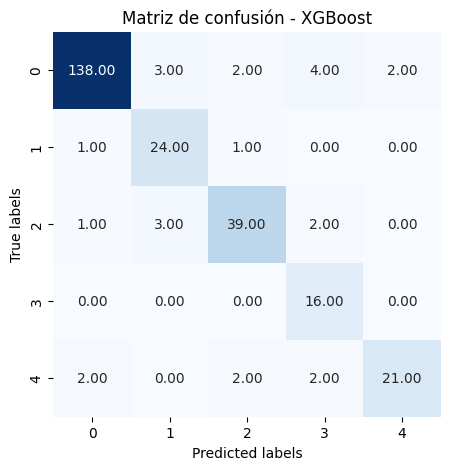

In [7]:
# evaluate_model xgb
print ("Exactitud del modelo de XGBoost: ",train_accuracyxgb,  accuracyxgb)
plot_confusion_matrix(confusionxgb, "XGBoost")



# dataset 

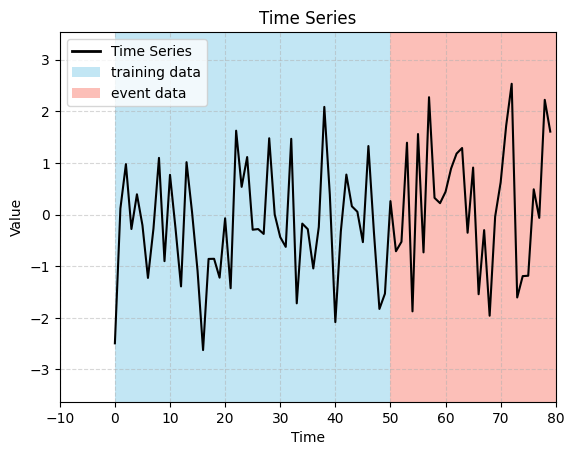

In [8]:

ventana_features = 80
ventana_falla = 30
n_samples = 1000 
 

color1_start = 0
color1_end = ventana_features  - ventana_falla 
color2_start = ventana_features  - ventana_falla
color2_end = ventana_features
# Call the function with specified segment parameters, hex color codes, and descriptions
plot_time_series_with_colored_segments(white_start=-10, white_end=0, color1_start=color1_start, color1_end=color1_end, color2_start=color2_start, color2_end=color2_end, color1_hex='#87CEEB', color2_hex='#fa8072', time_series_color='#000000', description1='training data', description2='event data',time_series_length=ventana_features)


In [9]:
df_failures_telemetry_agg

mean_volt    mean_rot  mean_press   mean_vib    max_volt  \
id_falla                                                              
0         170.531039  456.201984  100.490012  47.616515  215.656488   
1         177.349055  453.004847  101.140273  40.047256  211.699980   
2         171.324943  371.894679  101.893130  39.339070  203.104007   
3         172.507370  468.114615  100.127784  44.054041  202.610866   
4         169.249910  449.144643   97.975818  49.223726  207.324122   
...              ...         ...         ...        ...         ...   
1308      173.532724  448.671276   99.537533  42.390969  205.922866   
1309      170.158560  448.676714   98.946359  40.122680  195.085807   
1310      168.099439  458.887164  103.649632  38.894612  192.721200   
1311      170.583788  454.535954  100.064203  40.507064  214.404534   
1312      166.848357  450.580616  102.835413  40.561828  190.520432   

             max_rot   max_press    max_vib    min_volt     min_rot  \
id_falla                                                              
0         568.972310  127.014498  66.764515  129.016707  374.127148   
1         578.744306  117.308568  52.891394  138.411029  360.736832   
2         489.502527  121.827141  50.877634  146.713080  215.619476   
3         581.811206  126.893326  61.150030  138.300867  381.047123   
4         586.839392  121.728619  67.409029  138.740244  345.711420   
...              ...         ...        ...         ...         ...   
1308      568.509851  126.407444  59.390286  143.335705  316.985716   
1309      588.393263  116.231470  51.538254  146.760321  334.944901   
1310      582.129496  142.995348  49.574126  142.304519  370.144808   
1311      559.248699  121.545419  53.670349  134.974282  342.777959   
1312      581.768216  129.336021  50.470433  138.597511  329.871326   

          min_press    min_vib   std_volt    std_rot  std_press   std_vib  \
id_falla                                                                    
0         80.668287  30.665184  16.197188  39.070354  10.746510  8.173590   
1         84.557438  25.002313  17.491971  49.773911   7.845809  5.445791   
2         79.552597  30.093808  13.732406  54.763409   9.274640  4.194294   
3         81.351236  29.443212  14.823837  43.322180   8.151996  7.352134   
4         75.959631  37.484103  14.512206  48.343363  11.071074  7.809216   
...             ...        ...        ...        ...        ...       ...   
1308      77.021908  30.759994  14.509493  47.420543  10.577554  7.510491   
1309      78.444266  28.004941  11.989759  53.816370   8.843560  5.389516   
1310      77.037310  25.687218  13.255926  43.798833  11.033122  5.755992   
1311      80.504211  27.345608  14.146979  47.416153   8.739934  5.491435   
1312      79.624682  29.333023  13.983386  49.620378   9.591010  4.639703   

          failure_binary  failure  
id_falla                           
0                      1        4  
1                      1        1  
2                      1        2  
3                      1        4  
4                      1        4  
...                  ...      ...  
1308                   0        0  
1309                   0        0  
1310                   0        0  
1311                   0        0  
1312                   0        0  

[1313 rows x 18 columns]

In [10]:
features = ['mean_volt', 'mean_rot', 'mean_press', 'mean_vib', 'max_volt',
       'max_rot', 'max_press', 'max_vib', 'min_volt', 'min_rot', 'min_press',
       'min_vib', 'std_volt', 'std_rot', 'std_press', 'std_vib']

target = 'failure_binary'
# Seleccionar características y variable objetivo
X = df_failures_telemetry_agg[features]
y = df_failures_telemetry_agg[target]

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = train_xgboost(X_train, y_train)
train_accuracyxgb, accuracyxgb, confusionxgb = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

Exactitud del modelo de XGBoost:  0.9095238095238095 0.9277566539923955


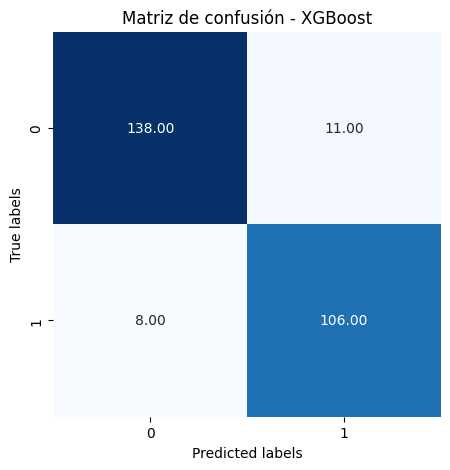

In [11]:
# evaluate_model xgb
print ("Exactitud del modelo de XGBoost: ",train_accuracyxgb,  accuracyxgb)
plot_confusion_matrix(confusionxgb, "XGBoost")

## Cross validation: 

In [12]:
from sklearn.model_selection import cross_val_score


In [13]:

features = ['mean_volt', 'mean_rot', 'mean_press', 'mean_vib', 'max_volt',
       'max_rot', 'max_press', 'max_vib', 'min_volt', 'min_rot', 'min_press',
       'min_vib', 'std_volt', 'std_rot', 'std_press', 'std_vib']

target = 'failure_binary'

# Select features and target variable
X = df_failures_telemetry_agg[features]
y = df_failures_telemetry_agg[target]

# Set up cross-validation
cv_folds = 5

# Train the XGBoost model using cross-validation
xgb_model = train_xgboost(X, y)  # Make sure your train_xgboost function can handle both X and y without splitting

# Calculate cross-validated accuracy
cv_accuracy = cross_val_score(xgb_model, X, y, cv=cv_folds, scoring='accuracy')

# Get the average accuracy across all folds
average_accuracy = cv_accuracy.mean()

# calculate the standard deviation of the accuracy 
std_accuracy = cv_accuracy.std()

# prin the average accuracy rounded to 4 decimal places and the standard deviation rounded to 4 decimal places 
print(f"Average accuracy: {average_accuracy:.4f} +/- {std_accuracy:.4f}")


Average accuracy: 0.8926 +/- 0.0261


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2 
from sklearn.model_selection import GridSearchCV

## Features selection 

Tested methods: 


* mutual_info_classif 
* f_classif  
* chi2 

In [87]:


features = ['mean_volt', 'mean_rot', 'mean_press', 'mean_vib', 'max_volt',
       'max_rot', 'max_press', 'max_vib', 'min_volt', 'min_rot', 'min_press',
       'min_vib', 'std_volt', 'std_rot', 'std_press', 'std_vib']

target = 'failure_binary'

# Select features and target variable
X = df_failures_telemetry_agg[features]
y = df_failures_telemetry_agg[target]

# Set up cross-validation
cv_folds = 5
# Perform feature selection using SelectKBest and  mutual_info_classif f_classif  chi2 
k_best = 8

selector = SelectKBest(f_classif, k=k_best)
X_selected = selector.fit_transform(X, y)
selected_features = [features[i] for i in range(len(features)) if selector.get_support()[i]]



# Train the XGBoost model using cross-validation
xgb_model = train_xgboost(X_selected, y)  # Make sure your train_xgboost function can handle both X and y without splitting

# Calculate cross-validated accuracy
cv_accuracy = cross_val_score(xgb_model, X_selected, y, cv=cv_folds, scoring='accuracy')

# Get the average accuracy across all folds
average_accuracy = cv_accuracy.mean()

print(f"Selected features: {selected_features}")
print(f"Cross-validated accuracy: {average_accuracy:.4f}")


Selected features: ['mean_volt', 'mean_rot', 'mean_press', 'mean_vib', 'max_volt', 'max_vib', 'min_rot', 'std_rot']
Cross-validated accuracy: 0.9033


In [88]:
selected_features

['mean_volt',
 'mean_rot',
 'mean_press',
 'mean_vib',
 'max_volt',
 'max_vib',
 'min_rot',
 'std_rot']

### Report

In [85]:

#import sweetviz as sv
#selected_features
#my_report = sv.analyze(df_failures_telemetry_agg,"failure_binary")
#my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

#my_report.show_notebook(  w=None, 
#                h=None, 
#                scale=None,
#                layout='widescreen',
#                filepath='report.html')

## Model interpretation

In [61]:
import shap
shap.initjs()

In [82]:
selected_features

['mean_volt',
 'mean_rot',
 'mean_press',
 'mean_vib',
 'max_volt',
 'max_vib',
 'min_rot',
 'std_rot']

In [62]:
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


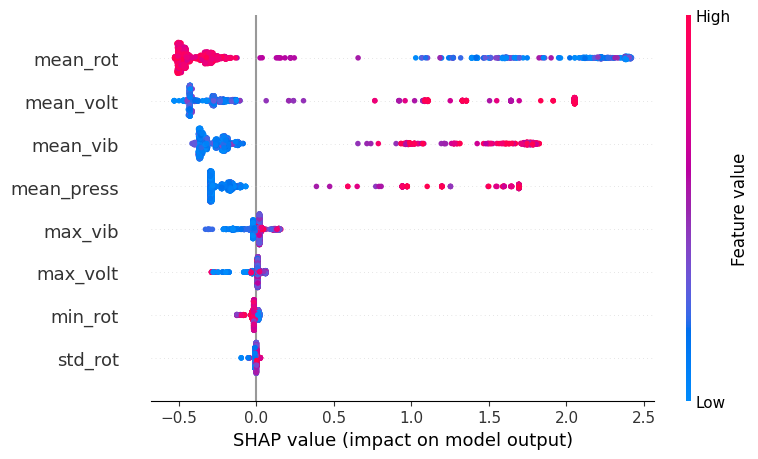

In [63]:
# Explain the model using SHAP values
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_selected_df)
# Plot the SHAP values summary
shap.summary_plot(shap_values, X_selected, feature_names=selected_features)

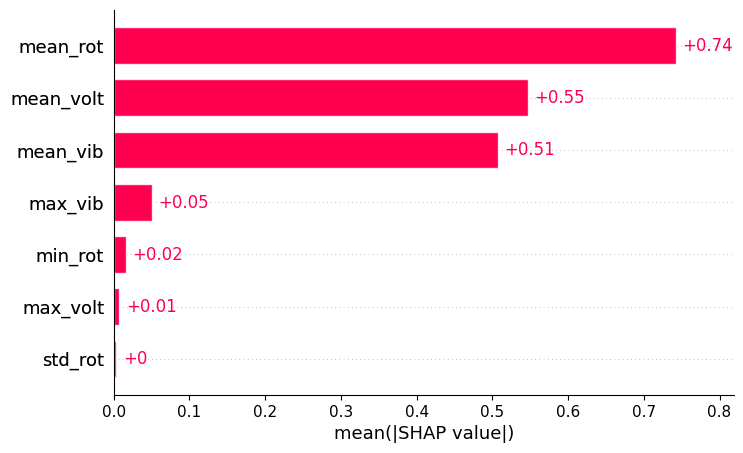

In [38]:
shap.plots.bar(shap_values)


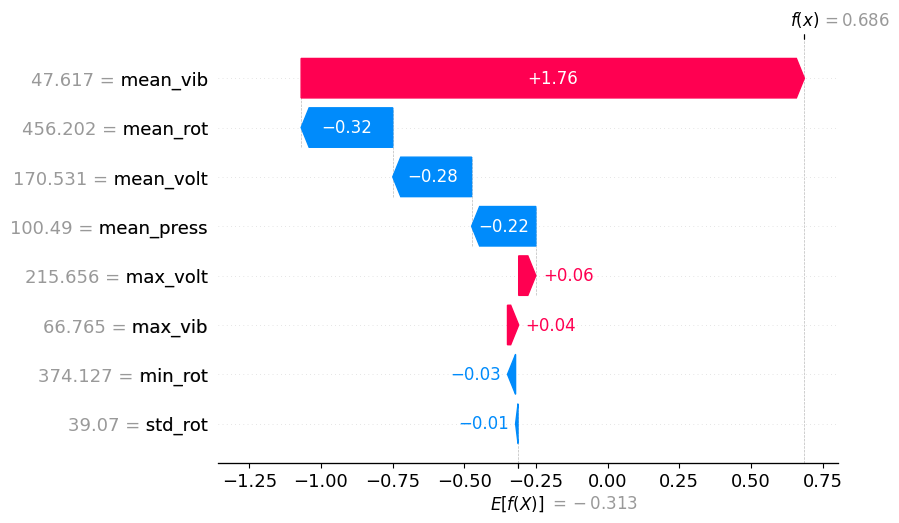

In [92]:
shap.plots.waterfall(shap_values[0])


In [24]:
# hyper parameters: 

## hyper parameters:

In [25]:
#

In [93]:

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier( eval_metric="logloss")

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [6,8,10,14,16],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2,3, 4,5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Configure the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform hyperparameter tuning using GridSearchCV
grid_search.fit(X_selected, y)

## Get the best hyperparameters
best_params = grid_search.best_params_
#
## Train the XGBoost model with the best hyperparameters
#xgb_model_tuned = xgb.XGBClassifier(**best_params, eval_metric="logloss")
#xgb_model_tuned.fit(X_train, y_train)
#
## Evaluate the tuned model
#train_accuracy_xgb_tuned, accuracy_xgb_tuned, confusion_xgb_tuned = evaluate_model(xgb_model_tuned, X_train, y_train, X_test, y_test)
#
#print(f"Best hyperparameters: {best_params}")
#print(f"Train accuracy (tuned): {train_accuracy_xgb_tuned:.4f}")
#print(f"Test accuracy (tuned): {accuracy_xgb_tuned:.4f}")


Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [6, 8, 10, 14, 16],
                         'subsample': [0.8, 1]},
             scoring='accuracy', verbose=1)

In [96]:
print (grid_search.best_score_)
print (grid_search.best_params_)

0.9101123269381477
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 10, 'subsample': 1}


In [99]:
df_results = pd.DataFrame(grid_search.cv_results_)
df_results.sort_values(by='rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
685        0.021281      0.000193         0.001734        0.000074   
1634       0.024114      0.000665         0.001625        0.000051   
1276       0.033487      0.004249         0.001682        0.000097   
1274       0.023644      0.000410         0.001657        0.000082   
1636       0.032664      0.001652         0.001606        0.000249   
922        0.016156      0.000251         0.001543        0.000187   
1994       0.023730      0.000640         0.001598        0.000017   
202        0.017073      0.000983         0.001757        0.000210   
1996       0.037918      0.010074         0.001638        0.000033   
562        0.016972      0.000495         0.001708        0.000069   

     param_colsample_bytree param_gamma param_learning_rate param_max_depth  \
685                     0.8         0.1                 0.2               4   
1634                      1         0.1                 0.1               4   
1276                      1           0                 0.1               4   
1274                      1           0                 0.1               4   
1636                      1         0.1                 0.1               4   
922                     0.8         0.2                 0.1               4   
1994                      1         0.2                 0.1               4   
202                     0.8           0                 0.1               4   
1996                      1         0.2                 0.1               4   
562                     0.8         0.1                 0.1               4   

     param_min_child_weight param_n_estimators param_subsample  \
685                       5                 10               1   
1634                      3                 10             0.8   
1276                      3                 14             0.8   
1274                      3                 10             0.8   
1636                      3                 14             0.8   
922                       5                  8             0.8   
1994                      3                 10             0.8   
202                       5                  8             0.8   
1996                      3                 14             0.8   
562                       5                  8             0.8   

                                                 params  split0_test_score  \
685   {'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...           0.912548   
1634  {'colsample_bytree': 1, 'gamma': 0.1, 'learnin...           0.920152   
1276  {'colsample_bytree': 1, 'gamma': 0, 'learning_...           0.920152   
1274  {'colsample_bytree': 1, 'gamma': 0, 'learning_...           0.920152   
1636  {'colsample_bytree': 1, 'gamma': 0.1, 'learnin...           0.920152   
922   {'colsample_bytree': 0.8, 'gamma': 0.2, 'learn...           0.920152   
1994  {'colsample_bytree': 1, 'gamma': 0.2, 'learnin...           0.920152   
202   {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...           0.920152   
1996  {'colsample_bytree': 1, 'gamma': 0.2, 'learnin...           0.920152   
562   {'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...           0.920152   

      split1_test_score  split2_test_score  split3_test_score  \
685            0.923954           0.916350           0.896947   
1634           0.923954           0.912548           0.896947   
1276           0.923954           0.912548           0.896947   
1274           0.923954           0.912548           0.896947   
1636           0.923954           0.912548           0.896947   
922            0.923954           0.912548           0.896947   
1994           0.923954           0.912548           0.896947   
202            0.923954           0.912548           0.896947   
1996           0.923954           0.912548           0.896947   
562            0.923954           0.912548           0.896947   

      split4_test_score  mean_test_score  std_test_score  rank_

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip


In [31]:
# 

# lgb 

In [105]:
# Define the LightGBM classifier with random_state parameter
lgb_clf = lgb.LGBMClassifier(random_state=123, metric='logloss')



# Define the hyperparameter search space
param_grid = {
    'n_estimators': [6,8,10,14,16,18,20],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2,3, 4,5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.2],
    'subsample': [0.8,0.9, 1],
    'colsample_bytree': [0.8,0.9, 1]
}

# Configure the GridSearchCV
grid_search = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform hyperparameter tuning using GridSearchCV
grid_search.fit(X_selected, y)


Fitting 5 folds for each of 9072 candidates, totalling 45360 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Wa

GridSearchCV(cv=5, estimator=LGBMClassifier(metric='logloss', random_state=123),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1],
                         'gamma': [0, 0.1, 0.2, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [6, 8, 10, 14, 16, 18, 20],
                         'subsample': [0.8, 0.9, 1]},
             scoring='accuracy', verbose=1)

In [106]:
print (grid_search.best_score_)
print (grid_search.best_params_)

0.9085827068760339
{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 0.8}


In [101]:
print (grid_search.best_score_)
print (grid_search.best_params_)

0.9078222506022697
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 14, 'subsample': 0.8}


In [107]:
df_results = pd.DataFrame(grid_search.cv_results_)
df_results.sort_values(by='rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3472       0.014188      0.003379         0.000826        0.000034   
5005       0.011070      0.000599         0.000849        0.000019   
3471       0.010606      0.000094         0.000773        0.000025   
4985       0.011324      0.000844         0.000850        0.000068   
4227       0.013735      0.004273         0.001132        0.000611   
4228       0.010566      0.000187         0.000811        0.000009   
4229       0.011178      0.000613         0.000822        0.000024   
4983       0.013387      0.003595         0.000830        0.000036   
4984       0.011080      0.000469         0.000837        0.000025   
5762       0.012988      0.002957         0.000823        0.000028   

     param_colsample_bytree param_gamma param_learning_rate param_max_depth  \
3472                    0.9           0                 0.1               5   
5005                    0.9         0.2                 0.1               5   
3471                    0.9           0                 0.1               5   
4985                    0.9         0.2                 0.1               5   
4227                    0.9         0.1                 0.1               5   
4228                    0.9         0.1                 0.1               5   
4229                    0.9         0.1                 0.1               5   
4983                    0.9         0.2                 0.1               5   
4984                    0.9         0.2                 0.1               5   
5762                    0.9         0.2                 0.1               5   

     param_min_child_weight param_n_estimators param_subsample  \
3472                      1                 10             0.9   
5005                      3                 10             0.9   
3471                      1                 10             0.8   
4985                      1                 10               1   
4227                      1                 10             0.8   
4228                      1                 10             0.9   
4229                      1                 10               1   
4983                      1                 10             0.8   
4984                      1                 10             0.9   
5762                      3                 10               1   

                                                 params  split0_test_score  \
3472  {'colsample_bytree': 0.9, 'gamma': 0, 'learnin...            0.91635   
5005  {'colsample_bytree': 0.9, 'gamma': 0.2, 'learn...            0.91635   
3471  {'colsample_bytree': 0.9, 'gamma': 0, 'learnin...            0.91635   
4985  {'colsample_bytree': 0.9, 'gamma': 0.2, 'learn...            0.91635   
4227  {'colsample_bytree': 0.9, 'gamma': 0.1, 'learn...            0.91635   
4228  {'colsample_bytree': 0.9, 'gamma': 0.1, 'learn...            0.91635   
4229  {'colsample_bytree': 0.9, 'gamma': 0.1, 'learn...            0.91635   
4983  {'colsample_bytree': 0.9, 'gamma': 0.2, 'learn...            0.91635   
4984  {'colsample_bytree': 0.9, 'gamma': 0.2, 'learn...            0.91635   
5762  {'colsample_bytree': 0.9, 'gamma': 0.2, 'learn...            0.91635   

      split1_test_score  split2_test_score  split3_test_score  \
3472           0.923954            0.91635            0.89313   
5005           0.923954            0.91635            0.89313   
3471           0.923954            0.91635            0.89313   
4985           0.923954            0.91635            0.89313   
4227           0.923954            0.91635            0.89313   
4228           0.923954            0.91635            0.89313   
4229           0.923954            0.91635            0.89313   
4983           0.923954            0.91635            0.89313   
4984           0.923954            0.91635            0.89313   
5762           0.923954            0.91635            0.89313   

      split4_test_score  mean_test_score  std_test_score  rank_

# CatBoost

In [108]:

# Define the CatBoost classifier with random_seed parameter
cat_clf = CatBoostClassifier(random_seed=123, eval_metric="Logloss")

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [6,8,10,14,16],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [2, 3, 4, 5],
    'l2_leaf_reg': [1, 3, 5],
    'subsample': [0.8, 1],
    'colsample_bylevel': [0.8, 1]
}

# Configure the GridSearchCV
grid_search = GridSearchCV(estimator=cat_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform hyperparameter tuning using GridSearchCV
grid_search.fit(X_selected, y)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
0:	learn: 0.6900774	total: 49.1ms	remaining: 245ms
0:	learn: 0.6903233	total: 49.4ms	remaining: 247ms
0:	learn: 0.6904743	total: 49.4ms	remaining: 247ms
1:	learn: 0.6868478	total: 49.7ms	remaining: 99.3ms
1:	learn: 0.6873729	total: 50ms	remaining: 100ms
2:	learn: 0.6839286	total: 50.2ms	remaining: 50.2ms
3:	learn: 0.6818123	total: 50.6ms	remaining: 25.3ms
2:	learn: 0.6845663	total: 50.6ms	remaining: 50.6ms
4:	learn: 0.6789333	total: 51ms	remaining: 10.2ms
5:	learn: 0.6756244	total: 51.4ms	remaining: 0us
1:	learn: 0.6872732	total: 51.3ms	remaining: 103ms
2:	learn: 0.6844021	total: 51.8ms	remaining: 51.8ms
3:	learn: 0.6812595	total: 52.2ms	remaining: 26.1ms
3:	learn: 0.6814833	total: 52.6ms	remaining: 26.3ms
4:	learn: 0.6783198	total: 52.6ms	remaining: 10.5ms
5:	learn: 0.6747480	total: 53ms	remaining: 0us
4:	learn: 0.6786293	total: 53.7ms	remaining: 10.7ms
0:	learn: 0.6899732	total: 56.3ms	remaining: 281ms
1:	learn: 0.686973

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fc5112d7d00>,
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.8, 1], 'depth': [2, 3, 4, 5],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [6, 8, 10, 14, 16],
                         'subsample': [0.8, 1]},
             scoring='accuracy', verbose=1)

In [111]:
print (grid_search.best_score_)
print (grid_search.best_params_)

0.9131599570429281
{'colsample_bylevel': 1, 'depth': 5, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'n_estimators': 14, 'subsample': 0.8}


In [112]:
df_results = pd.DataFrame(grid_search.cv_results_)
df_results.sort_values(by='rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
706       0.168566      0.040014         0.002040        0.000699   
672       0.160005      0.013249         0.003302        0.003049   
642       0.151670      0.004360         0.001770        0.000416   
702       0.160367      0.008785         0.001994        0.000165   
276       0.137776      0.005888         0.002870        0.002178   
712       0.160691      0.013356         0.001647        0.000218   
646       0.199114      0.029029         0.003539        0.002858   
674       0.167575      0.014348         0.001894        0.000409   
207       0.173744      0.006962         0.001809        0.000599   
209       0.173051      0.007467         0.002436        0.001273   

    param_colsample_bylevel param_depth param_l2_leaf_reg param_learning_rate  \
706                       1           5                 5                 0.1   
672                       1           5                 3                 0.1   
642                       1           5                 1                 0.1   
702                       1           5                 5                 0.1   
276                     0.8           5                 1                0.01   
712                       1           5                 5                 0.2   
646                       1           5                 1                 0.1   
674                       1           5                 3                 0.1   
207                     0.8           4                 1                 0.2   
209                     0.8           4                 1                 0.2   

    param_n_estimators param_subsample  \
706                 14             0.8   
672                  8             0.8   
642                  8             0.8   
702                  8             0.8   
276                 14             0.8   
712                  8             0.8   
646                 14             0.8   
674                 10             0.8   
207                 14               1   
209                 16               1   

                                                params  split0_test_score  \
706  {'colsample_bylevel': 1, 'depth': 5, 'l2_leaf_...           0.916350   
672  {'colsample_bylevel': 1, 'depth': 5, 'l2_leaf_...           0.916350   
642  {'colsample_bylevel': 1, 'depth': 5, 'l2_leaf_...           0.916350   
702  {'colsample_bylevel': 1, 'depth': 5, 'l2_leaf_...           0.916350   
276  {'colsample_bylevel': 0.8, 'depth': 5, 'l2_lea...           0.923954   
712  {'colsample_bylevel': 1, 'depth': 5, 'l2_leaf_...           0.908745   
646  {'colsample_bylevel': 1, 'depth': 5, 'l2_leaf_...           0.920152   
674  {'colsample_bylevel': 1, 'depth': 5, 'l2_leaf_...           0.916350   
207  {'colsample_bylevel': 0.8, 'depth': 4, 'l2_lea...           0.916350   
209  {'colsample_bylevel': 0.8, 'depth': 4, 'l2_lea...           0.916350   

     split1_test_score  split2_test_score  split3_test_score  \
706           0.927757           0.916350           0.900763   
672           0.923954           0.916350           0.900763   
642           0.927757           0.916350           0.896947   
702           0.923954           0.916350           0.896947   
276           0.927757           0.923954           0.885496   
712           0.920152           0.912548           0.904580   
646           0.916350           0.912548           0.900763   
674           0.916350           0.920152           0.893130   
207           0.923954           0.916350           0.896947   
209           0.920152           0.920152           0.893130   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
706           0.904580         0.913160        0.009599                1  
672           0.904580         0.912400        0.008500                2  
642           0.904580         0.912397        0.010649                3  
702           0.904580         0.9116